## Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## Sin Signal

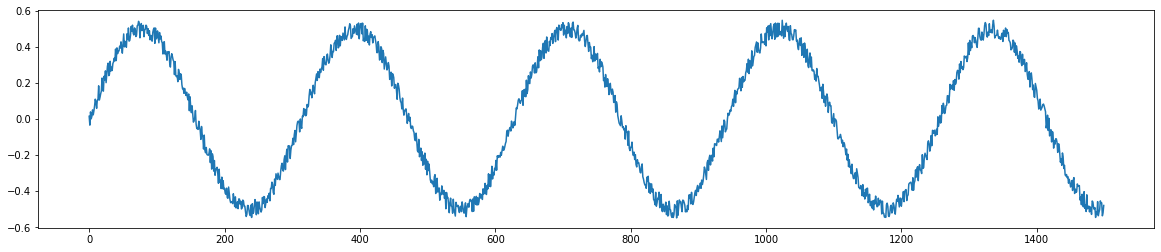

In [2]:
N = 1500
t = np.arange(0,N)
sin_data = np.sin(0.02*t)/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(20,4))
plt.plot(sin_data)
plt.show()

## Square Signal

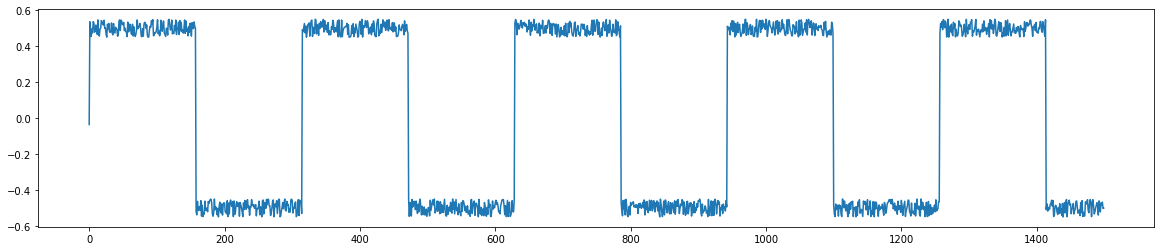

In [3]:
square_data = np.sign(np.sin(0.02*t))/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(20,4))
plt.plot(square_data)
plt.show()

## Triangle Signal

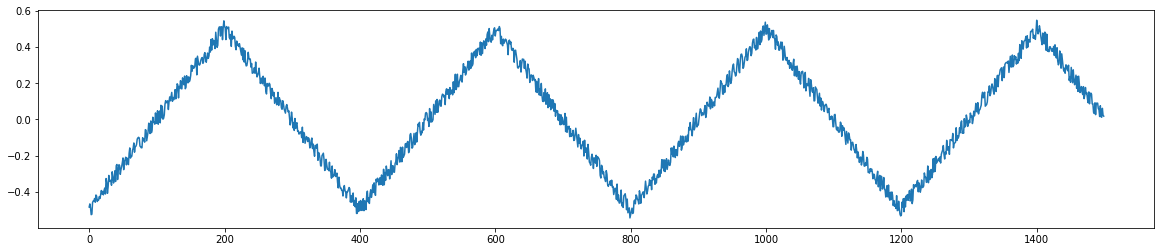

In [4]:
P = 200
A = 2 
triangle_data = ((A/P) * (P - np.abs(t % (2 * P) - P))-1) / 2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(20,4))
plt.plot(triangle_data)
plt.show()

## Convert Signal To Dataset

In [5]:
def convertSignalToDataset(signal,step,label):
    X,Y = [],[]
    for i in range(len(signal)-step):
        j = i+step
        X.append(signal[i:j])
        Y.append(label)
    
    return np.array(X), np.array(Y)

In [6]:
X_sin, Y_sin = convertSignalToDataset(sin_data,40,0)
X_square, Y_square = convertSignalToDataset(square_data,40,1)
X_triangle, Y_triangle = convertSignalToDataset(triangle_data,40,2) 

In [7]:
X = np.concatenate((X_sin,X_square,X_triangle),axis=0)
Y = np.concatenate((Y_sin,Y_square,Y_triangle),axis=0)
X = X[...,np.newaxis]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## Model
## LSTM

In [9]:
model = Sequential()
model.add(LSTM(units=64,input_shape=(X_train.shape[1:])))
model.add(Dense(128,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [10]:
model.compile(optimizer=Adam(),loss=sparse_categorical_crossentropy,metrics=["accuracy"])

In [11]:
history = model.fit(X_train,Y_train,
                   epochs=250,
                   batch_size = 32, 
                   validation_data=(X_test,Y_test))

Epoch 1/250
110/110 [==============================] - 3s 18ms/step - loss: 0.9535 - accuracy: 0.4917 - val_loss: 0.7266 - val_accuracy: 0.6210
Epoch 2/250
110/110 [==============================] - 2s 14ms/step - loss: 0.6750 - accuracy: 0.6430 - val_loss: 0.6213 - val_accuracy: 0.6610
Epoch 3/250
110/110 [==============================] - 1s 13ms/step - loss: 0.6650 - accuracy: 0.6518 - val_loss: 0.6579 - val_accuracy: 0.6826
Epoch 4/250
110/110 [==============================] - 1s 13ms/step - loss: 0.6287 - accuracy: 0.6630 - val_loss: 0.5763 - val_accuracy: 0.6530
Epoch 5/250
110/110 [==============================] - 1s 13ms/step - loss: 0.6037 - accuracy: 0.6658 - val_loss: 0.5400 - val_accuracy: 0.6598
Epoch 6/250
110/110 [==============================] - 1s 13ms/step - loss: 0.5469 - accuracy: 0.6864 - val_loss: 0.5098 - val_accuracy: 0.6804
Epoch 7/250
110/110 [==============================] - 1s 13ms/step - loss: 0.5561 - accuracy: 0.6855 - val_loss: 0.7327 - val_accuracy:

110/110 [==============================] - 2s 15ms/step - loss: 0.1567 - accuracy: 0.9326 - val_loss: 0.1318 - val_accuracy: 0.9406
Epoch 58/250
110/110 [==============================] - 2s 15ms/step - loss: 0.1505 - accuracy: 0.9318 - val_loss: 0.1905 - val_accuracy: 0.9167
Epoch 59/250
110/110 [==============================] - 2s 15ms/step - loss: 0.1410 - accuracy: 0.9384 - val_loss: 0.3309 - val_accuracy: 0.8961
Epoch 60/250
110/110 [==============================] - 2s 15ms/step - loss: 0.1713 - accuracy: 0.9218 - val_loss: 0.1109 - val_accuracy: 0.9498
Epoch 61/250
110/110 [==============================] - 2s 15ms/step - loss: 0.1589 - accuracy: 0.9298 - val_loss: 0.1292 - val_accuracy: 0.9555
Epoch 62/250
110/110 [==============================] - 2s 15ms/step - loss: 0.1697 - accuracy: 0.9244 - val_loss: 0.1813 - val_accuracy: 0.9098
Epoch 63/250
110/110 [==============================] - 2s 15ms/step - loss: 0.1750 - accuracy: 0.9212 - val_loss: 0.1651 - val_accuracy: 0.930

110/110 [==============================] - 2s 15ms/step - loss: 0.1116 - accuracy: 0.9498 - val_loss: 0.1009 - val_accuracy: 0.9578
Epoch 114/250
110/110 [==============================] - 2s 15ms/step - loss: 0.1014 - accuracy: 0.9541 - val_loss: 0.1315 - val_accuracy: 0.9475
Epoch 115/250
110/110 [==============================] - 2s 15ms/step - loss: 0.1077 - accuracy: 0.9561 - val_loss: 0.0765 - val_accuracy: 0.9726
Epoch 116/250
110/110 [==============================] - 2s 15ms/step - loss: 0.0904 - accuracy: 0.9626 - val_loss: 0.0975 - val_accuracy: 0.9578
Epoch 117/250
110/110 [==============================] - 2s 16ms/step - loss: 0.1052 - accuracy: 0.9578 - val_loss: 0.0935 - val_accuracy: 0.9509
Epoch 118/250
110/110 [==============================] - 2s 15ms/step - loss: 0.0917 - accuracy: 0.9609 - val_loss: 0.0763 - val_accuracy: 0.9658
Epoch 119/250
110/110 [==============================] - 2s 15ms/step - loss: 0.1687 - accuracy: 0.9349 - val_loss: 0.1640 - val_accuracy:

110/110 [==============================] - 2s 15ms/step - loss: 0.0684 - accuracy: 0.9723 - val_loss: 0.0730 - val_accuracy: 0.9635
Epoch 170/250
110/110 [==============================] - 2s 15ms/step - loss: 0.0781 - accuracy: 0.9695 - val_loss: 0.0606 - val_accuracy: 0.9737
Epoch 171/250
110/110 [==============================] - 2s 15ms/step - loss: 0.0917 - accuracy: 0.9618 - val_loss: 0.0536 - val_accuracy: 0.9806
Epoch 172/250
110/110 [==============================] - 2s 15ms/step - loss: 0.0671 - accuracy: 0.9720 - val_loss: 0.1159 - val_accuracy: 0.9555
Epoch 173/250
110/110 [==============================] - 2s 15ms/step - loss: 0.1007 - accuracy: 0.9609 - val_loss: 0.1455 - val_accuracy: 0.9441
Epoch 174/250
110/110 [==============================] - 2s 15ms/step - loss: 0.0824 - accuracy: 0.9632 - val_loss: 0.0634 - val_accuracy: 0.9817
Epoch 175/250
110/110 [==============================] - 2s 15ms/step - loss: 0.0722 - accuracy: 0.9735 - val_loss: 0.0910 - val_accuracy:

110/110 [==============================] - 2s 15ms/step - loss: 0.0726 - accuracy: 0.9683 - val_loss: 0.1048 - val_accuracy: 0.9600
Epoch 226/250
110/110 [==============================] - 2s 15ms/step - loss: 0.0633 - accuracy: 0.9760 - val_loss: 0.0753 - val_accuracy: 0.9737
Epoch 227/250
110/110 [==============================] - 2s 15ms/step - loss: 0.0715 - accuracy: 0.9732 - val_loss: 0.1018 - val_accuracy: 0.9589
Epoch 228/250
110/110 [==============================] - 2s 15ms/step - loss: 0.0888 - accuracy: 0.9638 - val_loss: 0.0712 - val_accuracy: 0.9658
Epoch 229/250
110/110 [==============================] - 2s 15ms/step - loss: 0.0658 - accuracy: 0.9735 - val_loss: 0.0551 - val_accuracy: 0.9760
Epoch 230/250
110/110 [==============================] - 2s 15ms/step - loss: 0.0828 - accuracy: 0.9666 - val_loss: 0.0713 - val_accuracy: 0.9760
Epoch 231/250
110/110 [==============================] - 2s 15ms/step - loss: 0.0597 - accuracy: 0.9737 - val_loss: 0.0506 - val_accuracy:

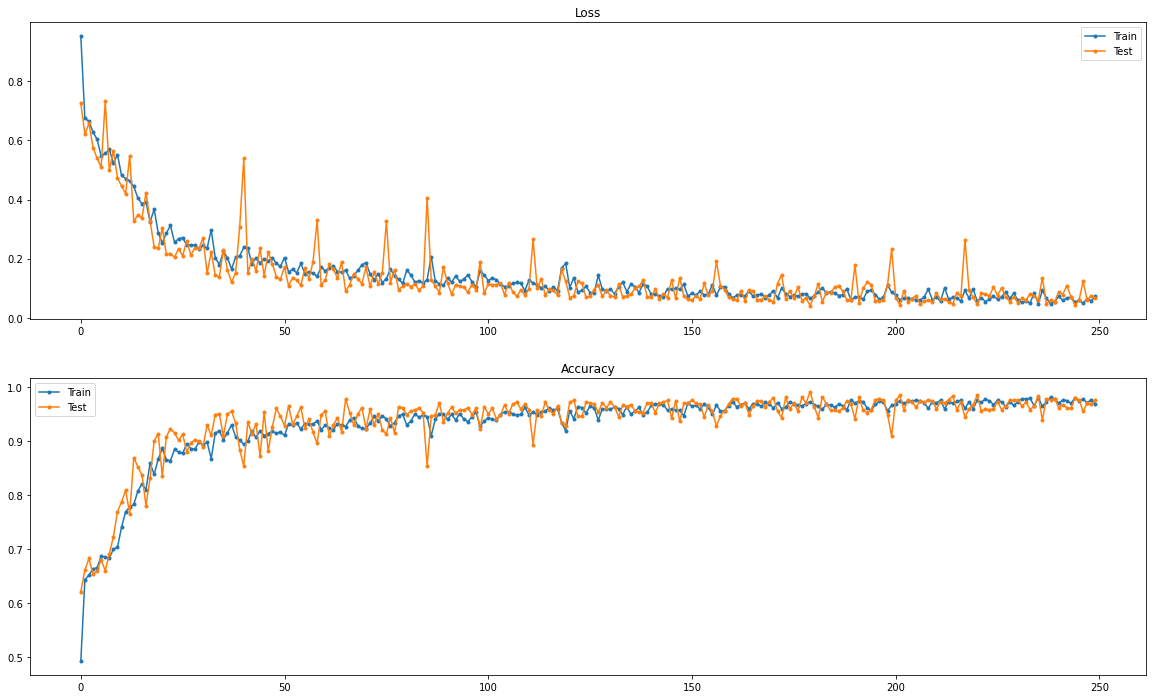

In [12]:
fig , (ax1,ax2) = plt.subplots(2,1,figsize=(20,12))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

# Inference

## Sin Signal

In [13]:
N = 40
t = np.arange(0,N)
x = np.sin(0.02*t)/2 + np.random.uniform(-0.05,0.05,N)
x = x[np.newaxis,...,np.newaxis]
print(np.argmax(model.predict(x)))

0


## Square Signal

In [14]:
N = 40
t = np.arange(0,N)
x = np.sign(np.sin(0.02*t))/2 + np.random.uniform(-0.05,0.05,N)
x = x[np.newaxis,...,np.newaxis]
print(np.argmax(model.predict(x)))

1


## Triangle Signal

In [15]:
N = 40
t = np.arange(0,N)
P = 200
A = 2 
x = ((A/P) * (P - np.abs(t % (2 * P) - P))-1) / 2 + np.random.uniform(-0.05,0.05,N)
x = x[np.newaxis,...,np.newaxis]
print(np.argmax(model.predict(x)))

2
